# Visualización de datos para un dataset sobre Counter-Strike

En este dataset tenemos información sobre partidas de counter strike, un videojuego de disparos en primera persona, donde el objetivo es ganar partidas donde se juega como terrorista o como contraterrorista. Los terroristas deben plantar la bomba en una de las dos zonas designadas y los contraterroristas deben evitar que la bomba sea plantada.

El dataset contiene todo tipo de información sobre las partidas, como el daño inflingido, la posición de dicho daño, resultados de las partidas, en que mapa se han jugado, etc...

A continuación cargaremos los distintos csv y analizaremos los tipos de datos que contienen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

#cargar los datos de daño
dmg_file_1 = "data/esea_master_dmg_demos.part1.csv"
dmg_file_2 = "data/esea_master_dmg_demos.part2.csv"

dmg_data_1 = pd.read_csv(dmg_file_1)
dmg_data_2 = pd.read_csv(dmg_file_2)
#unirlos en uno solo
dmg_data = pd.concat([dmg_data_1, dmg_data_2])

#cargar los datos sobre granadas
grenade_file_1 = "data/esea_master_grenades_demos.part1.csv"
grenade_file_2 = "data/esea_master_grenades_demos.part2.csv"

grenade_data_1 = pd.read_csv(grenade_file_1)
grenade_data_2 = pd.read_csv(grenade_file_2)
#unirlos en uno solo
grenade_data = pd.concat([grenade_data_1, grenade_data_2])

#cargar los datos sobre las partidas
part1_path = './data/esea_meta_demos.part1.csv'
part2_path = './data/esea_meta_demos.part2.csv'

esea_meta = pd.concat([pd.read_csv(part1_path),  pd.read_csv(part2_path)], ignore_index=True)


#cargar los datos sobre kills
kill_file_1 = "data/esea_master_kills_demos.part1.csv"
kill_file_2 = "data/esea_master_kills_demos.part2.csv"

kill_data_1 = pd.read_csv(kill_file_1)
kill_data_2 = pd.read_csv(kill_file_2)
#unirlos en uno solo
kill_data = pd.concat([kill_data_1, kill_data_2])




In [3]:
#revisar los datos de daño
dmg_data.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,...,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,14372,111.8476,World,Animal Style,NaN,CounterTerrorist,1,0,...,Unknown,Unkown,0,0,76561198055054795,0,0.0000,0.00000,0.0000,0.000000
1,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
2,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,...,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
3,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,...,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
4,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220


De esa tabla podemos extraer las siguientes columnas:
- `file`: El nombre del archivo de la partida.
- `round`: El número de ronda en la que se ha producido el daño.
- `tick`: El tick en el que se ha producido el daño.
- `seconds`: Los segundos en los que se ha producido el daño.
- `att_team`: El equipo del atacante. Nota importante, el equipo que realiza el daño a veces es World, que es causado por daños del entorno como la bomba.
- `vic_team`: El equipo de la víctima.
- `att_side`: El bando del atacante. None si el att_team es world
- `vic_side`: El bando de la víctima.
- `hp_dmg`: El daño de salud inflingido.
- `arm_dmg`: El daño de armadura inflingido.
- `is_bomb_planted`: Si la bomba está plantada en el momento del daño.
- `bomb_site`: El sitio de la bomba en el momento del daño. None si no hay bomba plantada.
- `hitbox`: La hitbox en la que se ha producido el daño. Que parte del cuerpo ha sido dañada.
- `wp`: El arma utilizada para inflingir el daño.
- `wp_type`: El tipo de arma utilizada.
- `att_id`: El identificador del atacante. 0 si ha sido world
- `att_rank`: El rango del atacante.
- `vic_id`: El identificador de la víctima.
- `vic_rank`: El rango de la víctima.
- `att_pos_x`: La posición x del atacante en el momento del daño.
- `att_pos_y`: La posición y del atacante en el momento del daño.
- `vic_pos_x`: La posición x de la víctima en el momento del daño.
- `vic_pos_y`: La posición y de la víctima en el momento del daño.

In [4]:
#revisar los datos de granadas
grenade_data.head()


,file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,...,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,153.1602,Animal Style,NaN,76561198165334141,NaN,CounterTerrorist,NaN,0,...,NaN,Smoke,0,NaN,-1618.146,-66.00259,-949.8569,-340.3019,NaN,NaN
1,esea_match_13770997.dem,2,184.7945,Hentai Hooligans,Animal Style,76561198037331400,7.656120e+16,Terrorist,CounterTerrorist,70,...,Generic,HE,0,0.0,-1719.904,-2357.64700,-2774.6650,-1603.9430,-2741.25,-1523.163
2,esea_match_13770997.dem,2,186.8617,Animal Style,NaN,76561198055191021,NaN,CounterTerrorist,NaN,0,...,NaN,HE,0,NaN,-1036.352,492.16760,-466.8676,-356.9641,NaN,NaN
3,esea_match_13770997.dem,2,187.1122,Animal Style,NaN,76561198055054795,NaN,CounterTerrorist,NaN,0,...,NaN,HE,0,NaN,-855.077,438.69090,-459.0147,-543.8581,NaN,NaN
4,esea_match_13770997.dem,2,191.0587,Hentai Hooligans,NaN,76561198037331400,NaN,Terrorist,NaN,0,...,NaN,Molotov,0,NaN,-2617.490,-1832.40700,-2743.5610,-927.2995,NaN,NaN


De esa tabla podemos extraer las siguientes columnas:
- `file`: El nombre del archivo de la partida.
- `round`: El número de ronda en la que se ha producido el daño.
- `seconds`: Los segundos en los que se ha producido el daño.
- `att_team`: El equipo del atacante. Nota importante, el equipo que realiza el daño a veces es `World`, que es causado por daños del entorno como la bomba.
- `vic_team`: El equipo de la víctima.
- `att_id`: El identificador del atacante. `0` si ha sido `World`.
- `vic_id`: El identificador de la víctima.
- `att_side`: El bando del atacante. `None` si el `att_team` es `World`.
- `vic_side`: El bando de la víctima.
- `hp_dmg`: El daño de salud infligido.
- `arm_dmg`: El daño de armadura infligido.
- `is_bomb_planted`: Si la bomba está plantada en el momento del daño.
- `bomb_site`: El sitio de la bomba en el momento del daño. `None` si no hay bomba plantada.
- `hitbox`: La hitbox en la que se ha producido el daño (qué parte del cuerpo ha sido dañada).
- `nade`: El tipo de granada utilizada.
- `att_rank`: El rango del atacante.
- `vic_rank`: El rango de la víctima..
- `nade_land_x`: La posición `x` donde la granada ha aterrizado.
- `nade_land_y`: La posición `y` donde la granada ha aterrizado.
- `att_pos_x`: La posición `x` del atacante en el momento del daño.
- `att_pos_y`: La posición `y` del atacante en el momento del daño.
- `vic_pos_x`: La posición `x` de la víctima en el momento del daño. Esta cordenada será NaN si la granada no causa daño.
- `vic_pos_y`: La posición `y` de la víctima en el momento del daño. Esta cordenada será NaN si la granada no causa daño.

In [6]:
#revisar los datos de las kills
kill_data.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


De esa tabla podemos extraer las siguientes columnas:
- `file`: El nombre del archivo de la partida.
- `round`: El número de ronda en la que se ha producido el daño.
- `tick`: El tick en el que se ha producido el daño.
- `seconds`: Los segundos en los que se ha producido el daño.
- `att_team`: El equipo del atacante. Nota importante, el equipo que realiza el daño a veces es `World`, que es causado por daños del entorno como la bomba.
- `vic_team`: El equipo de la víctima.
- `att_side`: El bando del atacante. `None` si el `att_team` es `World`.
- `vic_side`: El bando de la víctima.
- `wp`: El arma usada
- `wp_type`: El tipo de arma usada
- `ct_alive`: Cantidad de jugadores vivos en el equipo CT
- `t_alive`: Cantidad de jugadores vivos en el equipo T
- `is_bomb_planted`: Si la bomba está plantada en el momento de la baja.

In [5]:
#revisar los datos de las partidas
esea_meta.head()


,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


De esa tabla podemos extraer las siguientes columnas:
- `file`: El nombre del archivo de la partida.
- `map`: El nombre del mapa en el que se ha jugado la partida.
- `round`: El número de ronda en la que se ha producido el daño.
- `start_seconds`: Los segundos en los que ha empezado la ronda.
- `end_seconds`: Los segundos en los que ha terminado la ronda.
- `winner_team`: El equipo ganador de la ronda.
- `winner_side`: El bando ganador de la ronda. Terrorist o Counter
- `round_type`: Tipo de ronda, ronda de pistolas(primeras rondas), ECO (no se compra), Normal...
- `ct_eq_val` : Cantidad de dinero del equipo ct.
- `t_eq_val` : Cantidad de dinero del equipo t.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


# Cargar datos de ejemplo
dmg_file_1 = "data/esea_master_dmg_demos.part1.csv"
dmg_file_2 = "data/esea_master_dmg_demos.part2.csv"
map_data_file = "data/map_data.csv"
# Load metadata from the './data' directory
part1_path = './data/esea_meta_demos.part1.csv'
part2_path = './data/esea_meta_demos.part2.csv'

# Combine the two parts into a single DataFrame
esea_meta = pd.concat([
    pd.read_csv(part1_path),
    pd.read_csv(part2_path)
], ignore_index=True)
# Cargar archivos CSV
dmg_data_1 = pd.read_csv(dmg_file_1)
dmg_data_2 = pd.read_csv(dmg_file_2)
map_data = pd.read_csv(map_data_file)

# Combinar los datos de daño
dmg_data = pd.concat([dmg_data_1, dmg_data_2])

# Revisar si los datos están correctamente cargados
dmg_data.head()

# Renombrar la primera columna de map_data a 'map'
map_data.columns = ['map'] + list(map_data.columns[1:])

# Verificar el resultado después del renombramiento
map_data.head()

,map,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401


In [17]:
dmg_data.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,...,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,14372,111.8476,World,Animal Style,NaN,CounterTerrorist,1,0,...,Unknown,Unkown,0,0,76561198055054795,0,0.0000,0.00000,0.0000,0.000000
1,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
2,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,...,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
3,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,...,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
4,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220


In [34]:
def get_arrow_dataframe(dmg_data, esea_meta, map_name):
    """
    Filters dmg_data for a specific map using metadata and returns a DataFrame with arrow data.

    Parameters:
        dmg_data (pd.DataFrame): The damage data with attacker and victim positions.
        esea_meta (pd.DataFrame): Metadata containing map and round information.
        map_name (str): The name of the map to filter (e.g., 'de_dust2').

    Returns:
        pd.DataFrame: A new DataFrame with attacker and victim positions for the selected map.
    """
    # Filter the metadata for the selected map
    map_meta = esea_meta[esea_meta['map'] == map_name]
    if map_meta.empty:
        raise ValueError(f"No data found for map: {map_name}")
    
    # Merge dmg_data with metadata to filter for the selected map and rounds
    filtered_dmg_data = dmg_data.merge(
        map_meta[['file', 'round']], 
        on=['file', 'round'], 
        how='inner'
    )
    
    # Create a DataFrame with arrow data (attacker and victim positions)
    arrow_data = filtered_dmg_data[[
        'file', 'round', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y'
    ]].copy()
    
    # Add columns for arrow directions
    arrow_data['dx'] = arrow_data['vic_pos_x'] - arrow_data['att_pos_x']
    arrow_data['dy'] = arrow_data['vic_pos_y'] - arrow_data['att_pos_y']
    
    return arrow_data

First kills in the map detected
Applying scaling to attackers coordinates
Applying scaling to victims coordinates


C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Creating heatmap
Plotting heatmap


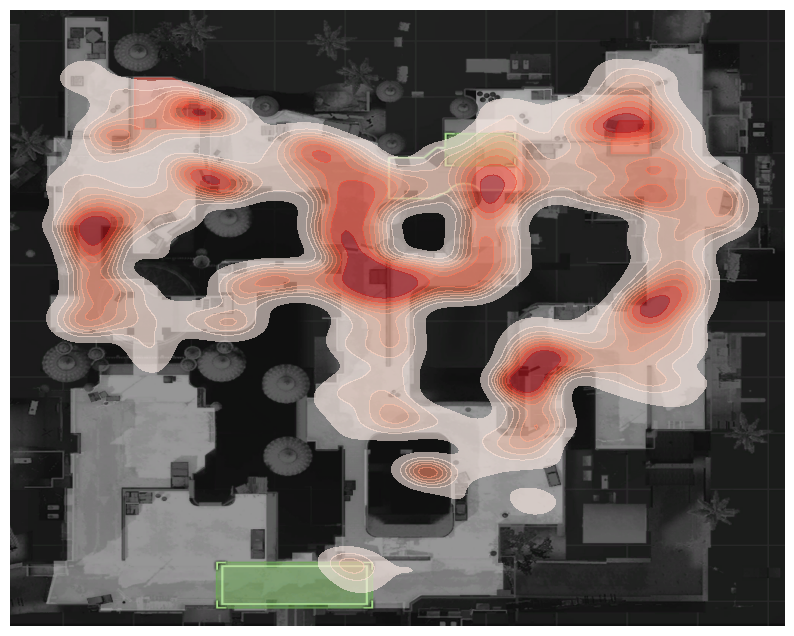

In [36]:
import seaborn as sns

def generate_heatmap(dmg_data, map_name, map_image_path, map_data, att_col, vic_col, output_path):

    
    # Filtrar el mapa relevante en el archivo de datos del mapa
    map_info = map_data[map_data['map'] == map_name].head(2500)
    if map_info.empty:
        raise ValueError(f"No se encontró información para el mapa: {map_name}")
    print("First kills in the map detected")
    # Extraer las dimensiones del mapa
    start_x, start_y = map_info[['StartX', 'StartY']].values[0]
    end_x, end_y = map_info[['EndX', 'EndY']].values[0]
    res_x, res_y = map_info[['ResX', 'ResY']].values[0]
    
    # Ajustar las coordenadas a las dimensiones del mapa
    def scale_coordinates(row, col_x, col_y):
        x_scaled = ((row[col_x] - start_x) / (end_x - start_x)) * res_x
        y_scaled = ((row[col_y] - start_y) / (end_y - start_y)) * res_y
        return x_scaled, y_scaled
    
    # Aplicar el escalado a las coordenadas de atacante y víctima
    print("Applying scaling to attackers coordinates")
    dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
        lambda row: scale_coordinates(row, att_col[0], att_col[1]),
        axis=1, result_type='expand'
    )
    print("Applying scaling to victims coordinates")
    dmg_data[['vic_pos_x_scaled', 'vic_pos_y_scaled']] = dmg_data.apply(
        lambda row: scale_coordinates(row, vic_col[0], vic_col[1]),
        axis=1, result_type='expand'
    )
    
    # Combinar las coordenadas escaladas en un solo DataFrame
    all_coords = pd.concat([
        dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']].rename(
            columns={'att_pos_x_scaled': 'x', 'att_pos_y_scaled': 'y'}
        ),
        dmg_data[['vic_pos_x_scaled', 'vic_pos_y_scaled']].rename(
            columns={'vic_pos_x_scaled': 'x', 'vic_pos_y_scaled': 'y'}
        )
    ])
    
    # Cargar la imagen del mapa
    map_image = Image.open(map_image_path)
    plt.figure(figsize=(10, 8))
    print("Creating heatmap")
    # Crear el heatmap
    sns.kdeplot(
        x=all_coords['x'], y=all_coords['y'], 
        fill=True, cmap='Reds', alpha=0.6, bw_adjust=0.5
    )
    print("Plotting heatmap")
    # Mostrar la imagen del mapa de fondo
    plt.imshow(map_image, extent=[0, res_x, 0, res_y], aspect='auto')
    plt.axis('off')  # Quitar los ejes
    
    # Guardar el heatmap
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()
    plt.close()



# Example Usage
dmg_dust2=get_arrow_dataframe(
    dmg_data=dmg_data, 
    esea_meta=esea_meta, 
    map_name='de_dust2',  # Replace with the desired map name # Output file path
)
# Generar mapa de calor de ejemplo para 'de_dust2' con las dimensiones oficiales
#pass on the first 2500 rows of the map_data that is dust2 map

generate_heatmap(
    dmg_dust2.head(10000),
    'de_dust2',
    'maps/de_dust2.png',
    map_data,
    att_col=['att_pos_x', 'att_pos_y'],
    vic_col=['vic_pos_x', 'vic_pos_y'],
    output_path='output/heatmap_de_dust2_fixed_v2.png'
)

First kills in the map detected
Applying scaling to attackers coordinates
Applying scaling to victims coordinates


C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Creating heatmap
Plotting heatmap


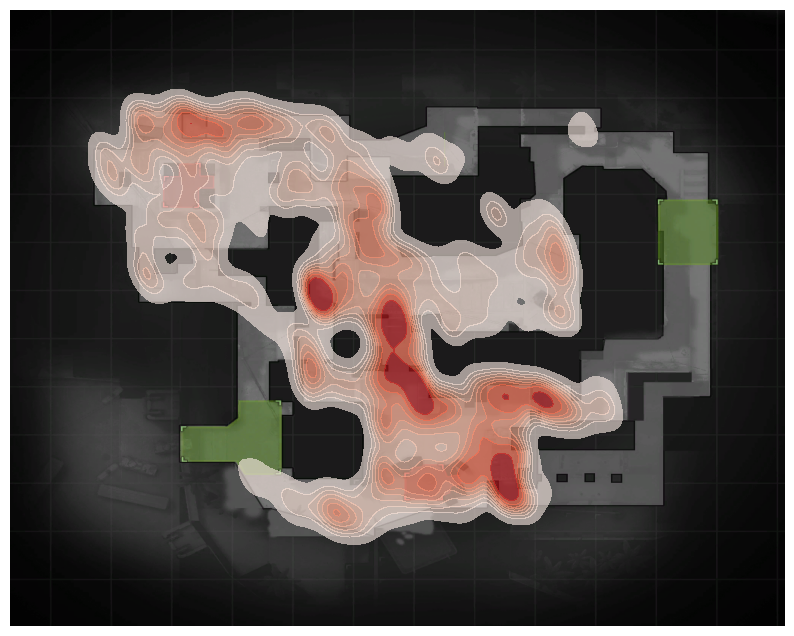

In [37]:
# now de_mirage
dmg_mirage=get_arrow_dataframe(
    dmg_data=dmg_data, 
    esea_meta=esea_meta, 
    map_name='de_mirage',  # Replace with the desired map name # Output file path
)

# Generar mapa de calor de ejemplo para 'de_mirage' con las dimensiones oficiales
generate_heatmap(
    dmg_mirage.head(10000),
    'de_mirage',
    'maps/de_mirage.png',
    map_data,
    att_col=['att_pos_x', 'att_pos_y'],
    vic_col=['vic_pos_x', 'vic_pos_y'],
    output_path='output/heatmap_de_mirage_fixed_v2.png'
)

First kills in the map detected
Applying scaling to attackers coordinates
Applying scaling to victims coordinates


C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Creating heatmap
Plotting heatmap


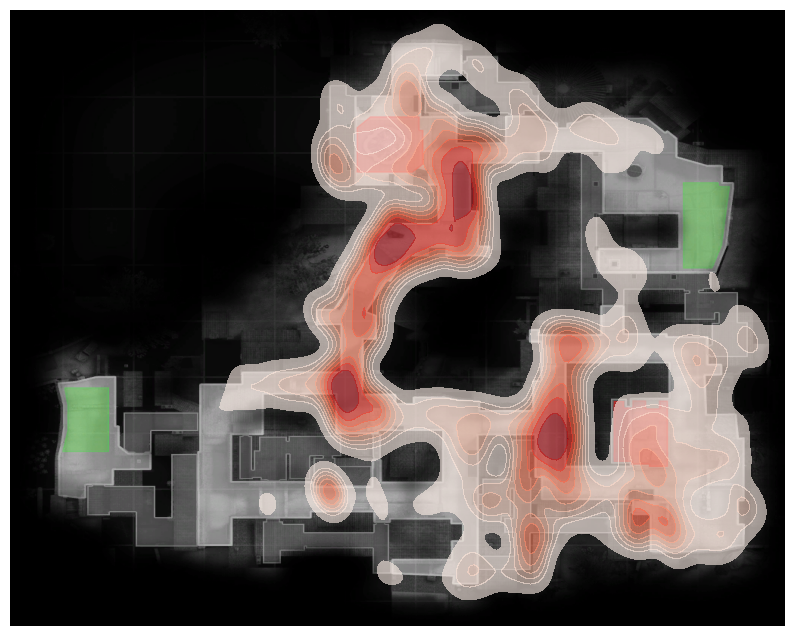

In [38]:
#now de_inferno
dmg_inferno=get_arrow_dataframe(
    dmg_data=dmg_data, 
    esea_meta=esea_meta, 
    map_name='de_inferno',  # Replace with the desired map name # Output file path
)

# Generar mapa de calor de ejemplo para 'de_inferno' con las dimensiones oficiales
generate_heatmap(
    dmg_inferno.head(10000),
    'de_inferno',
    'maps/de_inferno.png',
    map_data,
    att_col=['att_pos_x', 'att_pos_y'],
    vic_col=['vic_pos_x', 'vic_pos_y'],
    output_path='output/heatmap_de_inferno_fixed_v2.png'
)

First kills in the map detected
Applying scaling to attackers coordinates
Applying scaling to victims coordinates


C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmg_data[['att_pos_x_scaled', 'att_pos_y_scaled']] = dmg_data.apply(
C:\Users\alvar\AppData\Local\Temp\ipykernel_22644\1462456119.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Creating heatmap
Plotting heatmap


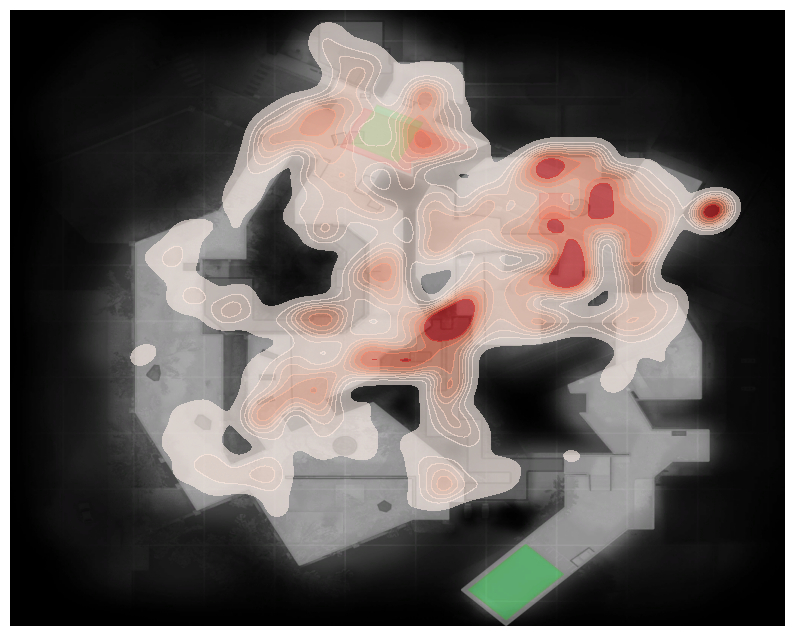

In [39]:
#now de_overpass
dmg_overpass=get_arrow_dataframe(
    dmg_data=dmg_data, 
    esea_meta=esea_meta, 
    map_name='de_overpass',  # Replace with the desired map name # Output file path
)

# Generar mapa de calor de ejemplo para 'de_overpass' con las dimensiones oficiales
generate_heatmap(
    dmg_overpass.head(10000),
    'de_overpass',
    'maps/de_overpass.png',
    map_data,
    att_col=['att_pos_x', 'att_pos_y'],
    vic_col=['vic_pos_x', 'vic_pos_y'],
    output_path='output/heatmap_de_overpass_fixed_v2.png'
)

### Para este proyecto y con el fin de minimizar la complejidad añadida que tiene analizar un videojuego nos enfocaremos en un unico mapa , dust2.

All the heatmax take into account all the damage